## Gram-schmidt

Example: Use the Gram-Schmidt algorithm to construct a set of orthonormal vectors spanning the same space as $\text{span}\{v_1=(1,-1,1,-1), v_2=(1,0,1,0), v_3=(4,0,2,-2)\}$.

 $q_1=\frac{v_1}{\|v_1\|}=\frac{1}{2}\left[\begin{array}{c}
1\\-1\\1\\-1
\end{array}\right]$

$q_2=\frac{v_2-(q_1^Tv_2)q_1}{r_{22}}=\frac{1}{r_{22}}\left(\left[\begin{array}{c}
1\\0\\1\\0
\end{array}\right]-\frac{1}{2}\left[\begin{array}{c}
1\\-1\\1\\-1
\end{array}\right]\right)=\frac{1}{2}\left[\begin{array}{c}
1\\1\\1\\1
\end{array}\right], r_{22}=1$

$q_3=\frac{v_3 - (q_1^Tv_3)q_1-(q_2^Tv_3)q_2}{r_{33}}=\frac{1}{r_{33}}\left(\left[\begin{array}{c}
4\\0\\2\\2
\end{array}\right]-\frac{4}{2}\left[\begin{array}{c}
1\\-1\\1\\-1
\end{array}\right]-\frac{2}{2}\left[\begin{array}{c}
1\\1\\1\\1
\end{array}\right]\right)=\frac{1}{r_{33}}\left(\left[\begin{array}{c}
4\\0\\2\\2
\end{array}\right]-\left[\begin{array}{c}
2\\-2\\2\\-2
\end{array}\right]-\left[\begin{array}{c}
1\\1\\1\\1
\end{array}\right]\right)=\frac{1}{2}\left[\begin{array}{c}
1\\1\\-1\\-1
\end{array}\right], r_{33}=2$


### Summary: Gram-Schmidt algorithm for finding an orthonormal set that will have the same span as $\{v_1,\cdots, v_n\}$.

$q_1=\frac{v_1}{\|v_1\|}=\frac{v_1}{r_{11}}$

$q_2= \frac{v_2 - P_{q_1}(v_2)}{r_{22}}= \frac{v_2 - (q_1^Tv_2)q_1}{r_{22}}= \frac{v_2 - r_{12}q_1}{r_{22}}$, where $r_{22}=\|v_2 - (v_2^Tq_1)q_1\|$

$q_3=\frac{v_3 - P_{\{q_1,q_2\}}(v_3)}{r_{33}}=\frac{v_3 - (q_1^Tv_3)q_1-(q_2^Tv_3)q_2}{r_{33}}=\frac{v_3 - r_{13}q_1-r_{23}q_2}{r_{33}}$

...

$q_n=\frac{v_n-\sum_{i=1}^{n-1}r_{in}q_i}{r_{nn}}$ 

The coefficients $r_{ij}=q_i^Tv_j$ and $r_{jj}=\|v_j-\sum_{i=1}^{j-1}r_{ij}q_i\|_2$

This algorithm can be rearranged as 
\begin{align*}
&v_1=r_{11}q_1\\
&v_2=r_{12}q_1+r_{22}q_2\\
&v_3=r_{13}q_1+r_{23}q_2+r_{33}q_3\\
&\cdots\\
&v_n=r_{1n}q_1+r_{2n}q_2+r_{3n}q_3+\cdots+r_{nn}q_n,
\end{align*}

which is equivalent to
$$
[v_1, v_2, \cdots, v_n]=[q_1, q_2, \cdots, q_n]\left[\begin{array}{ccccccc}
r_{11} &r_{12}&\cdots&r_{1n}\\
0&r_{22}&\cdots&r_{2n}\\
\vdots&\vdots&\vdots &\vdots\\
0&0&\cdots&r_{n-1,n}\\
0&0&\cdots&r_{nn}
\end{array}\right]
$$

## QR Decomposition

Any matrix $A$ can be decomposed as $A=QR$ where $Q$ has orthonormal columns and $R$ is upper triangular.

Gram-Schmidt provides a way to do QR decomposition. In other words, QR decomposition is just finding an ONB for $C(A)$ and the $R$ matrix is the coefficients through this change of basis.

### QR decomposition is the most important algorithm in numerical linear algebra. 

Because in practice, it is used in finding least squares solutions, finding eigenvalues, and finding SVD.

### The most popular algorithm for QR decomposition is through Householder reflector, not Gram-schmits.

It is beyond the scope of this course to talk about Householder reflector, but you may read Lecture 10 of this classical book:

*Numerical Linear algebra by By Lloyd N. Trefethen, David Bau*.

## Finding a basis (of a subspace) is useful.

In [1]:
import numpy as np
import json
from scipy.linalg import lu

In [2]:
A = np.random.randn(15,3)@np.random.randn(3,7)

In [4]:
np.set_printoptions(suppress=True)
%precision 2
print(A)

[[ 0.82  0.64  1.41  0.61 -1.07  0.99  1.58]
 [ 0.94  0.22  1.03  0.52 -0.63  0.77  1.73]
 [ 0.8  -1.54 -1.13 -1.52  1.71 -0.47 -0.5 ]
 [-0.5  -1.07 -1.58  0.28  1.27 -1.15  0.  ]
 [-0.66  1.44  1.06  0.1  -1.38  0.59 -1.04]
 [-0.92  1.97  1.56  2.61 -2.35  0.62  1.55]
 [-0.76  1.01  0.47 -0.4  -0.78  0.24 -1.66]
 [-0.16  1.1   1.08  0.04 -1.15  0.69 -0.42]
 [-1.03  0.91  0.15 -0.53 -0.57 -0.   -2.12]
 [ 0.43 -1.   -0.71  0.9   0.78 -0.49  1.87]
 [ 0.19 -0.67 -0.58  0.09  0.65 -0.36  0.51]
 [-1.28  0.15 -0.88 -0.03  0.25 -0.77 -1.64]
 [ 0.29 -0.35 -0.15  0.    0.29 -0.06  0.44]
 [-0.58 -0.42 -0.85  1.56  0.34 -0.81  1.3 ]
 [-0.65  1.27  0.89  0.2  -1.22  0.47 -0.86]]


In [5]:
C = np.array([[1,1,1],[1,2,3],[1,0,-1],[0,1,2]]).T;print(C)

[[ 1  1  1  0]
 [ 1  2  0  1]
 [ 1  3 -1  2]]


In [6]:
Lc,Uc = lu(C,permute_l=True)

In [7]:
Lc

array([[ 1. ,  0. ,  0. ],
       [ 1. ,  0.5,  1. ],
       [ 1. ,  1. ,  0. ]])

In [8]:
Uc

array([[ 1.,  1.,  1.,  0.],
       [ 0.,  2., -2.,  2.],
       [ 0.,  0.,  0.,  0.]])

In [9]:
L,U = lu(A, permute_l=True)

In [10]:
U

array([[-1.28,  0.15, -0.88, -0.03,  0.25, -0.77, -1.64],
       [ 0.  ,  1.86,  2.19,  2.63, -2.52,  1.17,  2.73],
       [ 0.  ,  0.  ,  0.11,  2.26, -0.43, -0.16,  2.75],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

We have $A = LU$

In [11]:
np.allclose(A, L@U)

True

In [ ]:
print(L)
print(U)

In [12]:
x,res,rank,s = np.linalg.lstsq(U[:,:3],U[:,3:],rcond=False)

In [13]:
print(x)
print(res)

[[-16.07   2.73   1.79 -18.32]
 [-21.86   3.06   2.23 -26.83]
 [ 19.76  -3.75  -1.35  24.02]]
[ 0.  0.  0.  0.]


### Try word to vec again

In [14]:
path = "./data/"

In [15]:
vecs = np.load(path + "glove_vectors_100d.npy")

In [16]:
with open(path + "words.txt") as f:
    content = f.readlines()
words = [x.strip() for x in content] 

In [17]:
wordidx = json.load(open(path + "wordsidx.txt"))

In [18]:
vecs[wordidx['frog']]

array([ 0.04,  0.53,  0.54, -0.08, -0.3 ,  0.53,  0.21,  0.16, -0.4 ,
       -0.92, -0.66,  0.69,  0.11, -0.11, -0.34,  1.04,  0.13,  0.51,
        0.6 ,  0.71, -0.54,  0.38,  0.12,  0.61,  0.5 ,  2.02, -0.47,
        0.47,  0.13,  0.6 ,  0.11,  0.38,  1.01, -0.25,  0.66,  0.13,
       -0.58, -0.26,  0.62,  0.01, -0.41,  0.16, -0.85, -0.25,  0.29,
        0.85, -0.07,  0.69, -0.72, -0.25, -0.75, -0.27,  0.49,  0.42,
       -0.87, -0.52, -0.45, -0.04,  0.03,  0.3 ,  0.74,  0.82,  0.69,
        0.8 ,  0.29, -0.03, -0.3 , -0.34,  0.12, -0.3 ,  0.11, -0.19,
        0.19, -0.75, -0.26,  0.34, -0.02,  0.  ,  0.39,  0.99, -0.32,
       -0.49,  0.42, -0.01, -0.17, -0.21,  0.28, -0.83,  0.8 ,  0.62,
        0.32, -0.28, -0.55,  0.23,  0.02, -0.16, -1.44, -0.75,  0.51, -0.53], dtype=float32)

In [19]:
B = np.vstack((vecs[wordidx['frog']], vecs[wordidx['algebra']], vecs[wordidx['math']],
               vecs[wordidx['toad']],vecs[wordidx['frogs']],vecs[wordidx['algebraic']])).T

In [20]:
Lb,Ub = lu(B, permute_l=True)

In [21]:
print(Ub)

[[ 2.02 -1.03 -0.91  1.42  0.6  -0.07]
 [ 0.    1.95  1.23  0.34  0.6   1.41]
 [ 0.    0.   -1.64 -0.09 -0.59  0.08]
 [ 0.    0.    0.    1.21  0.76  0.62]
 [ 0.    0.    0.    0.   -1.47  0.44]
 [ 0.    0.    0.    0.    0.    1.35]]


In [22]:
# try to find the approximation of column 4if they have to be written 
# as the linear combination of column 1,2,3
xb,resb,rankb,sb = np.linalg.lstsq(Ub[:,:3],Ub[:,3:],rcond=False)

In [23]:
print(xb)

[[ 0.8   0.5   0.33]
 [ 0.14  0.08  0.75]
 [ 0.05  0.36 -0.05]]


In [ ]:
resb

### More applications

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [25]:
img = mpimg.imread(path+'church.jpg')
img.shape

(384, 450, 3)

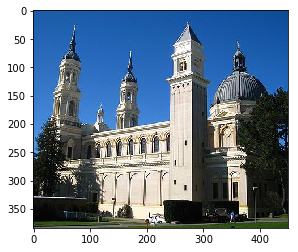

In [26]:
plt.imshow(img)

In [27]:
I = img[:,:,0]

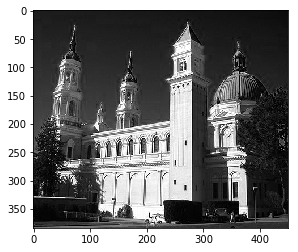

In [28]:
plt.imshow(I, cmap = 'gray')

In [29]:
l = 384*450
FC = np.fft.fft(I.reshape(l))

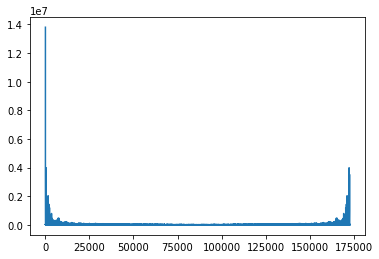

In [30]:
plt.plot(np.arange(l), np.absolute(FC))